In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, utils
from torchvision.utils import save_image
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import os
import matplotlib.pyplot as plt
from PIL import Image

# 路径设置（根据自己情况修改）
data_path = r'D:/Python/data/img/dogs/'  # 数据集路径
model_path = './models/gan_dogs_model.pth'  # 模型保存路径
generated_images_path = './output'  # 生成图片保存路径

# 创建generated_images目录
os.makedirs(generated_images_path, exist_ok=True)

# 使用ImageFolder来读取数据
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])
dataset = ImageFolder(root=data_path, transform=transform)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# print(device)

In [13]:
# 生成器
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            nn.ConvTranspose2d(100, 512, 4, 1, 0, bias=False),
            nn.BatchNorm2d(512),
            nn.ReLU(True),
            nn.ConvTranspose2d(512, 256, 4, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(True),
            nn.ConvTranspose2d(256, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(True),
            nn.ConvTranspose2d(128, 64, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(True),
            nn.ConvTranspose2d(64, 3, 4, 2, 1, bias=False),
            nn.Tanh()
        )

    def forward(self, input):
        return self.main(input)

# 判别器
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            nn.Conv2d(3, 64, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(128, 256, 4, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(256, 512, 4, 2, 1, bias=False),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(512, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.main(input).view(-1, 1).squeeze(1)

# TODO:初始化生成器和判别器
generator = 
discriminator = 

# TODO:损失函数和优化器
criterion = 
optimizer_G = 
optimizer_D = 

# 训练生成对抗网络
epochs = 100
for epoch in range(epochs):
    for i, (real_images, _) in enumerate(dataloader):
        # 训练判别器
        discriminator.zero_grad()
        
        real_images = real_images.to(device)
        batch_size = real_images.size(0)
        real_labels = torch.full((batch_size,), 1, dtype=torch.float, device=device)
        
        output = discriminator(real_images).squeeze()
        loss_real = criterion(output, real_labels)
        loss_real.backward()

        noise = torch.randn(batch_size, 100, 1, 1, device=device)
        fake_images = generator(noise)
        fake_labels = torch.full((batch_size,), 0, dtype=torch.float, device=device)
        
        output = discriminator(fake_images.detach()).squeeze()
        loss_fake = criterion(output, fake_labels)
        loss_fake.backward()
        
        optimizer_D.step()

        # 训练生成器
        generator.zero_grad()
        output = discriminator(fake_images).squeeze()
        loss_G = criterion(output, real_labels)
        loss_G.backward()
        optimizer_G.step()
        
    print(f"Epoch [{epoch+1}/{epochs}], D Loss: {loss_real.item()+loss_fake.item():.4f}, G Loss: {loss_G.item():.4f}")

# 保存模型
torch.save({
    'generator_state_dict': generator.state_dict(),
    'discriminator_state_dict': discriminator.state_dict(),
    'optimizer_G_state_dict': optimizer_G.state_dict(),
    'optimizer_D_state_dict': optimizer_D.state_dict(),
}, model_path)


Epoch [1/200], D Loss: 1.3853, G Loss: 6.2603
Epoch [2/200], D Loss: 1.7136, G Loss: 9.7053
Epoch [3/200], D Loss: 0.4421, G Loss: 9.4447
Epoch [4/200], D Loss: 0.1841, G Loss: 5.9936
Epoch [5/200], D Loss: 0.1890, G Loss: 12.5407
Epoch [6/200], D Loss: 0.2133, G Loss: 11.6005
Epoch [7/200], D Loss: 0.1965, G Loss: 3.8700
Epoch [8/200], D Loss: 0.4868, G Loss: 4.3956
Epoch [9/200], D Loss: 1.9220, G Loss: 6.6756
Epoch [10/200], D Loss: 0.5758, G Loss: 6.2540
Epoch [11/200], D Loss: 0.3655, G Loss: 4.4363
Epoch [12/200], D Loss: 0.5539, G Loss: 2.9277
Epoch [13/200], D Loss: 0.9888, G Loss: 4.9961
Epoch [14/200], D Loss: 0.5455, G Loss: 3.4407
Epoch [15/200], D Loss: 1.0930, G Loss: 4.1624
Epoch [16/200], D Loss: 0.5404, G Loss: 3.9140
Epoch [17/200], D Loss: 0.4563, G Loss: 4.5275
Epoch [18/200], D Loss: 0.4846, G Loss: 5.3178
Epoch [19/200], D Loss: 0.8096, G Loss: 4.8700
Epoch [20/200], D Loss: 0.3430, G Loss: 4.4305
Epoch [21/200], D Loss: 0.3653, G Loss: 4.0055
Epoch [22/200], D Lo

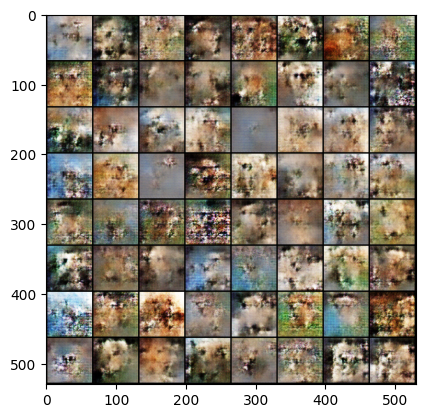

In [14]:
# 生成图片并保存
with torch.no_grad():
    noise = torch.randn(64, 100, 1, 1, device=device)
    fake_images = generator(noise)
    utils.save_image(fake_images, f"{generated_images_path}/dogs_{epoch}.png",
                     normalize=True, nrow=8)

# 打印出生成的图片
img = Image.open(f"{generated_images_path}/dogs_{epoch}.png")
plt.imshow(img)
plt.show()